The values obtained from 100 rolls are the following: 

[ 7 20 15 11  8  7 19 11 11  4  8  3  2 12  6  2  1 12 12 17 10 16 15 15 19
 12 20  3  5 19  7  9  7 18  4 14 18  9  2 20 15  7 12  8 15  3 14 17  4 18
  8  4  2  6 10  4 18 12  2 10  4 14 16 15  8 14  8 16 13 18 15 13  9 15 13
  1  7  9  1 12  8 11 19 17  8  3  3  1  5 10  7  9  7  9  8 12  2  1 16  5]

Mean = 10.01 and standard deviation = 5.51, for 100 rolls



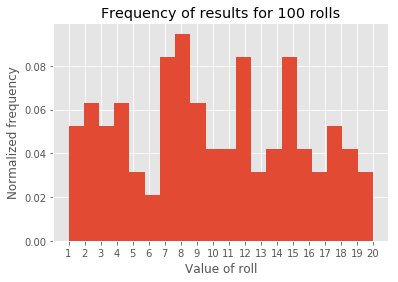

Mean = 10.50 and standard deviation = 5.77, for 1 roll



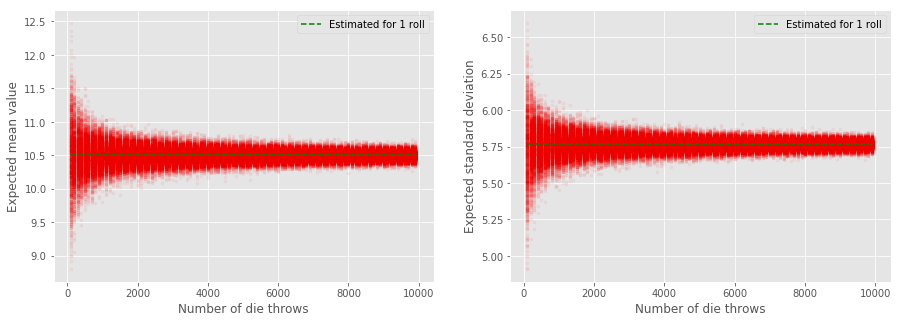

In [1]:
# Importing required packages

%matplotlib inline
import numpy as np # linear algebra
import matplotlib.pyplot as plt # making plots

# Emulating ggplot style
plt.style.use('ggplot')

# Setting random state for reproducibility
np.random.seed(42)

# Function for simulating a die roll
def RollDie(NumberofRolls = 1, show = False):
    """"" 
    This function simulates roll of a fair 20-sided die.
    Parameters:
        NumberofRolls: Number of times the die should be rolled
        show: True/False, print values or not (default = False)
    Returns:
        Array of values of the result obtained for each roll
    """""
    
    # Potential results of a roll
    pResults = np.arange(1, 21, step = 1, dtype = int)
        
    # Selecting a random result from potential results
    Results = np.random.choice(pResults, NumberofRolls)

    # Printing results
    if show == True:
        print('The values obtained from {} rolls are the following: \n\n{}\n'.format(NumberofRolls, Results))
    
    # Outputing the result
    return Results

def RollDieOutput(NumberofRolls = 1,show = False):
    """"" 
    This function prints and plots results of RollDie function Also, returns values obtained and thier mean and std.
    Parameters:
        NumberofRolls: Number of times the die should be rolled
        show: True/False, print values or not (default = False)
    Returns: 
        Array of values of the result obtained for each roll
        Mean of values
        Std of values
    """""
    # Using RollDie to simulate output of rolls for a fair 20-sided die
    Results = RollDie(NumberofRolls, show)

    # Mean and standard deviation of results for a fair 20-sided die
    Mean_Results = np.mean(Results) # mean
    Std_Results = np.std(Results) # std

    # Printing the mean and standard deviation
    print('Mean = %.2f and standard deviation = %.2f, for %.0f rolls\n' % (Mean_Results, Std_Results, NumberofRolls))

    # Plotting a histogram of results for a fair 20-sided die
    fig1 = plt.figure()
    plt.hist(Results, bins = 20, normed = True)
    plt.xticks(np.arange(1, 21, step = 1))# Setting x ticks
    plt.xlabel('Value of roll') # labelling x axis
    plt.ylabel('Normalized frequency') # labelling y axis
    plt.title('Frequency of results for ' + str(NumberofRolls) + ' rolls'); # labelling title
    plt.show()
    
    # Return results, mean and standard deviation
    return Results, Mean_Results, Std_Results

# Using RollDie to simulate output of 100 rolls for a fair 20-sided die
Die1 = RollDieOutput(100,True)

# Expected value and standard deviation for 1 roll
# Mean value of 1 roll should be the mean of numbers between 1 and 21 and every value
# has the same probability. Similarly standard deviation should be standard deviation of these
# numbers

Mean_1roll = np.mean(np.arange(1, 21, 1, dtype = int)) # mean of value of a single roll
Std_1roll = np.std(np.arange(1, 21,1, dtype = int)) # standard deviation of the mean

# Printing the mean and standard deviation
print('Mean = %.2f and standard deviation = %.2f, for %.0f roll\n' % (Mean_1roll, Std_1roll, 1))

# Array for number of rolls of the dye
X = list(range(100, 10000, 100))

# making 2 subplots
fig , (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

# Looping over the array of number of rolls
for j in X:
    
    # Initializing arrays for storing values of mean and standard deviation
    Mean1 = np.empty(1000)
    Std1 = np.empty(1000)
    
    # Calculating mean and std for j number of rolls 100 times
    for k in range(1000):
        Results = RollDie(j) # rolling die j number of times
        Mean1[k] = np.mean(Results) # calculating mean
        Std1[k] = np.std(Results) # calculating std
    
    # Plotting
    x = [j for i in range(1000)] # setting x axis
    ax1.scatter(x, Mean1, marker = '.', alpha = 0.05, color = 'r')
    ax2.scatter(x, Std1, marker = '.', alpha = 0.05, color = 'r')

# Plotting lines for theoratical values for 1 roll
MeanT = [Mean_1roll for k in range(len(X))]
StdT = [Std_1roll for k in range(len(X))]

ax1.plot(X, MeanT, color = 'g', linestyle = '--', label = 'Estimated for 1 roll')
ax2.plot(X, StdT, color = 'g', linestyle = '--', label = 'Estimated for 1 roll')

# Setting xy, labels and legend
ax1.set_xlabel('Number of die throws')
ax2.set_xlabel('Number of die throws')
ax1.set_ylabel('Expected mean value')
ax2.set_ylabel('Expected standard deviation')
ax1.legend()
ax2.legend()
plt.show();